<a href="https://colab.research.google.com/github/Natalia-Blinnikova/vacancies_skills_analysis/blob/main/hh_ru_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import re 

In [ ]:
df = pd.read_csv('databaseHH.csv', sep=';')
df.describe()

,name,experience,schedule,employment,employer,published,salary_from,salary_to,description,key_skills
count,1038,1035,1035,1035,1035,1035,1035,1035,1035,760
unique,755,4,5,3,555,31,64,53,995,664
top,Учитель начальных классов,between1And3,fullDay,full,Центр онлайн-обучения Нетология-групп,19.04.2021,None,None,Привет!Можешь ли ты представить свое будущее б...,"Преподаватель,Обучение,Дистанционное обучение,..."
freq,38,500,567,523,35,120,460,599,15,14


In [ ]:
df.head()

,name,experience,schedule,employment,employer,published,salary_from,salary_to,description,key_skills
0,Преподаватель психологии,between1And3,flexible,project,Ассоциация Разработчиков в Сфере Инноваций,19.04.2021,50000,100000,Требуется автор и спикер курса «Психология и с...,"Возрастная психология,Детская психология,Клини..."
1,Преподаватель в онлайн-школу,between1And3,remote,part,Айтигенио,18.04.2021,None,80000,Преподаватель в онлайн-школу для детей Айтиген...,"Преподаватель,Работа с детьми"
2,Преподаватель по химии,between3And6,fullDay,full,Центр онлайн-обучения Нетология-групп,19.04.2021,110000,140000,Привет! Мы ищем преподавателя по химии в «Фокс...,"Преподаватель,Обучение,Дистанционное обучение,..."
3,Преподаватель частной музыкальной школы,between1And3,flexible,part,Ульянов Максим Александрович,19.04.2021,44000,120000,Добрый день! Музыкальная Школа Максима Ульянов...,"Преподаватель,Обучение и развитие,музыкант,гит..."
4,Преподаватель английского язык в языковую школ...,noExperience,flexible,full,Школа иностранных языков Friends,19.04.2021,None,None,Пожалуйста прочтите вакансию до конца!!! Мы – ...,"Креативность,Грамотная речь,Обучение и развити..."


Сначала я выбрала работодателей, которые опубликовали на хх.ру больше 5 вакансий, и сделала список из них, чтобы потом заблочить основной датасет только по этим работодателям. Отсортировала их. 

In [ ]:
emploers = df.loc[:, 'employer']
datalocked = df.groupby('employer').agg('count')
most_common_employer = datalocked[datalocked.name > 5].sort_values(by='name', ascending=False)
common_employer = list(most_common_employer.index)
len(common_employer)

25

In [ ]:
df.loc[df['employer'].isin(common_employer)].groupby('employer').agg('count').sum(axis=0)

name           309
experience     309
schedule       309
employment     309
published      309
salary_from    309
salary_to      309
description    309
key_skills     211
dtype: int64

In [ ]:
df.groupby('experience').count()

,name,schedule,employment,employer,published,salary_from,salary_to,description,key_skills
experience,,,,,,,,,
between1And3,500,500,500,500,500,500,500,500,373
between3And6,331,331,331,331,331,331,331,331,244
moreThan6,58,58,58,58,58,58,58,58,42
noExperience,146,146,146,146,146,146,146,146,101


Здесь я сначала создала датасет с самыми активными работодателями и навыками, который они требуют. 
Потом создала один большой список по всем работодателям. Но нужно было проанализировать каждого работодателя отдельно. Поэтому из этого списка я брала по одному значению (набор скилов для какого-либо одного работодателя), и все их скинула в один список, чтобы посчитать частоту использования навыков. Из этого списка я сделала датасет, сгруппировала и посчитала. 
ВЫВОДЫ: в топе из тех, которым можно обучить: дистанционной обучение, командная работа, создание и проведение презентаций, деловая коммуникация (межличностное общение тоже), языки программирования. 



In [ ]:
df_common_employers = df.loc[df['employer'].isin(common_employer)]['key_skills'].dropna()
common_emp_skills = list(df_common_employers.values)
common_skills = []
for item in common_emp_skills:
    itemlst = item.split(',')
    for skill in itemlst:
        common_skills.append(skill)
df_common_emp_skills = pd.DataFrame(common_skills)
df_common_emp_skills.groupby(0)[0].count().sort_values(ascending=False).head(50)

0
Обучение                               95
Преподаватель                          91
Обучение и развитие                    69
Грамотная речь                         54
Дистанционное обучение                 52
Работа в команде                       50
Организация учебного процесса          46
Грамотность                            37
Пользователь ПК                        32
Английский язык                        31
Организаторские навыки                 25
MS PowerPoint                          18
Индивидуальное обучение                13
Деловая коммуникация                   12
Python                                 10
Креативность                           10
Умение работать в команде              10
Windows Xp                              9
Общая психология                        9
Работа с большим объемом информации     8
Преподавание                            6
MS Paint                                6
Проведение презентаций                  6
Навыки межличностного общения   

То же самое сделала с общим датасетом. 
Какие скилы в топах: работа в команде, английский язык, пользователь ПК, организаторский навыки, дистанционное обучение, детская (и общая) психология, создание и проведение презентаций, деловая коммуникация (межличностное общение тоже, коммуникабельность), креативность (творческое мышление), индивидуальное обучение, групповое обучение, программирование, работа с большими объемами информации, стрессоустойчивость(и доброжелательность). 

In [ ]:
df_common_employers = df.loc[:, 'key_skills'].dropna()
common_emp_skills = list(df_common_employers.values)
common_skills = []
for item in common_emp_skills:
    itemlst = item.split(',')
    for skill in itemlst:
        common_skills.append(skill)
df_common_emp_skills = pd.DataFrame(common_skills)
df_common_emp_skills.groupby(0)[0].count().sort_values(ascending=False).head(50)

0
Преподаватель                          284
Грамотная речь                         269
Обучение и развитие                    240
Обучение                               210
Работа в команде                       182
Английский язык                        162
Грамотность                            139
Организация учебного процесса          132
Пользователь ПК                        124
Организаторские навыки                 107
Дистанционное обучение                  87
Детская психология                      69
Навыки межличностного общения           68
Креативность                            59
Общая психология                        58
Творческое мышление                     55
Умение работать в команде               45
MS PowerPoint                           41
Деловая коммуникация                    37
Индивидуальное обучение                 35
Групповое обучение                      33
Ответственность                         31
Возрастная психология                   31
Ориентаци

C:\Users\ns.blinnikova\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-9-306c9a4d55cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary.loc[salary['salary_to'] == 'None', 'salary_to'] = 1 #здесь я сначала блокирую строчки, где зарплата=none и выбираю столбец
C:\Users\ns.blinnikova\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<function matplotlib.pyplot.show(close=None, block=None)>

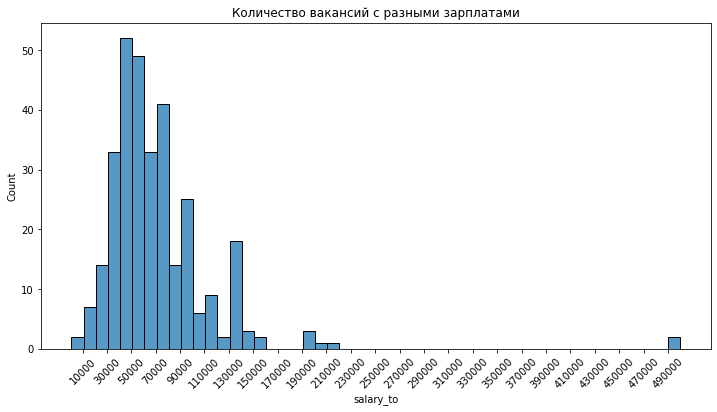

In [ ]:
salary=df

salary = salary.dropna()
salary.loc[salary['salary_to'] == 'None', 'salary_to'] = 1 #здесь я сначала блокирую строчки, где зарплата=none и выбираю столбец
#salary, и везде в этой серии (которая все еще часть датасета) проставляю 1
indexNone = salary.loc[salary['salary_to'] == 1].index 
salary.drop(indexNone, inplace=True) #здесь я убираю все строчки, где зарплата не указана (где она теперь 1)
salary = salary.astype({"salary_to": int}) #здесь все значения зарплаты преобразую в интеджер
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(data=salary, x='salary_to', bins=50)
ax.set_xticks(list(range(10000, 500000, 20000)))
plt.xticks(rotation=45)
ax.set_title("Количество вакансий с разными зарплатами")
plt.show

ВЫВОДЫ. Получается, что в общем было проанализировано 760 вакансий, наиболее частые зарплаты - от 30000 до 90000, в самом топе от 50000 до 70000

In [ ]:
salary.info() #смотрю, сколько вакансий было проанализировано для поиска спекта зарплат. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 1039
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         760 non-null    object
 1   experience   760 non-null    object
 2   schedule     760 non-null    object
 3   employment   760 non-null    object
 4   employer     760 non-null    object
 5   published    760 non-null    object
 6   salary_from  760 non-null    object
 7   salary_to    760 non-null    object
 8   description  760 non-null    object
 9   key_skills   760 non-null    object
dtypes: object(10)
memory usage: 65.3+ KB


In [ ]:
df.groupby('schedule').count()

,name,experience,employment,employer,published,salary_from,salary_to,description,key_skills
schedule,,,,,,,,,
flexible,205,205,205,205,205,205,205,205,155
flyInFlyOut,3,3,3,3,3,3,3,3,3
fullDay,567,567,567,567,567,567,567,567,396
remote,225,225,225,225,225,225,225,225,184
shift,35,35,35,35,35,35,35,35,22


In [ ]:
bins = list(range(0, 500000, 50000))
bins

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]

- - - - - 

Можно сделать разные датасеты по параметрам (график-зарплата) и посмотреть популярные навыки по разным сочетаниям этим параметров, то есть сделать сетку по скиллам. 


C:\Users\ns.blinnikova\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-23-b7e61838d014>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal.loc[sal['salary_to'].index.isin(indexNone), 'salary_to'] = 1
C:\Users\ns.blinnikova\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]


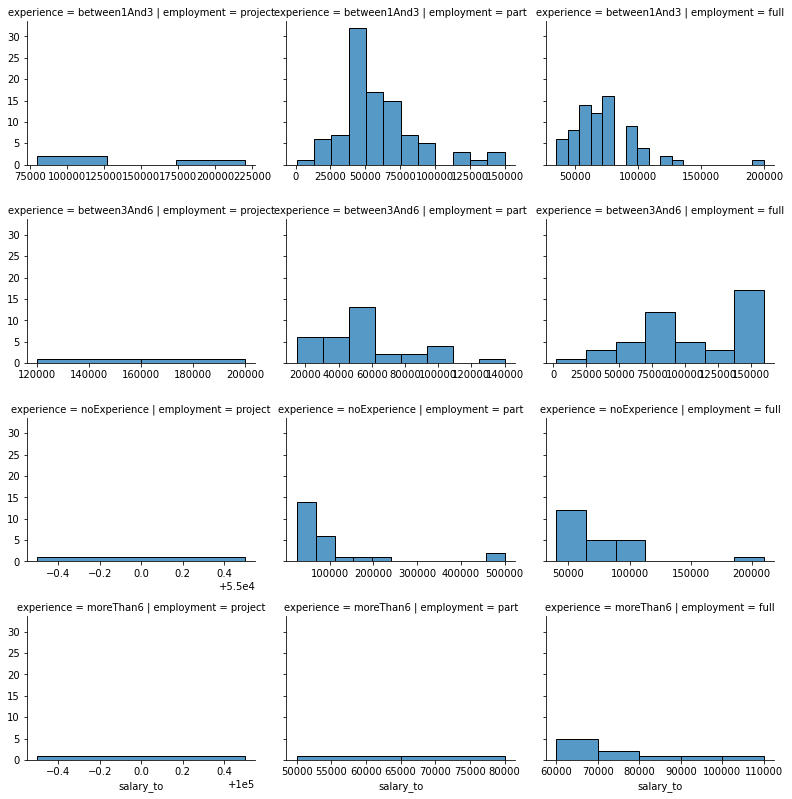

In [ ]:
sal=df
sal=sal.dropna()
indexNone = sal.loc[sal['salary_to'] == 'None'].index
sal.loc[sal['salary_to'].index.isin(indexNone), 'salary_to'] = 1 
sal.drop(indexNone, inplace=True) #а тут другой способ как None сделать 1 
sal = sal.astype({"salary_to": int})

print(bins)
setgraph = sns.FacetGrid(sal, row='experience', col='employment', height=2.8, aspect=1.3, sharex=False)
setgraph.map(sns.histplot, 'salary_to')
#setgraph.set(xticks=bins)
#setgraph.set_xticklabels(rotation=45)
setgraph.add_legend()

ВЫВОДЫ: похоже, хорошие зарплаты можно получать при полной занятости и трехлетнем опыте работы, там много зарплат от 50 до 150 тысяч. Без опыта и при полной занятости можно рассчитывать за зарплату в районе 50 тысяч, более 50 и до 100 тысяч средняя зарплата при полной занятости и до 3 лет опыта. При таком же опыте, но с частичной занятостью можно рассчиываться скорее на зарплату от 30 до 75 тысяч. При проектной работе вилка зарплат очень разная. 

In [ ]:
expIndex = list(df['experience'].unique()) 
emplIndex = list(df['employment'].unique())
unique_combinations = []
for elem in expIndex: 
    for item in emplIndex:    
        zipped = (elem, item)
        unique_combinations.append(zipped)
unique_combinations 

[('between1And3', 'project'),
 ('between1And3', 'part'),
 ('between1And3', 'full'),
 ('between1And3', nan),
 ('between3And6', 'project'),
 ('between3And6', 'part'),
 ('between3And6', 'full'),
 ('between3And6', nan),
 ('noExperience', 'project'),
 ('noExperience', 'part'),
 ('noExperience', 'full'),
 ('noExperience', nan),
 ('moreThan6', 'project'),
 ('moreThan6', 'part'),
 ('moreThan6', 'full'),
 ('moreThan6', nan),
 (nan, 'project'),
 (nan, 'part'),
 (nan, 'full'),
 (nan, nan)]

In [ ]:
skill_dict = {}
for exp, emp in unique_combinations:
    end_list = []
    dataset = df.loc[(df['experience']==exp) & (df['employment']==emp)] #блокируем данные под выбранный опыт и график
    dataset.fillna('ничего', inplace=True)
    for value in dataset['key_skills'].values: 
        lst = value.split(',') #получаем список скилов под заблокированный датасет
        for item in lst:
            end_list.append(item)
    finish_list = []
    for word in end_list:
        word = word.lower()
        if word not in ['ничего', 'преподаватель', 'обучение', 'преподавание']:
            finish_list.append(word)  
    string_to_append = ",".join(finish_list)
    #add_str = string_to_append.replace(',', " ") = это оставим, если используем регулярные выражения. 
    skill_dict[str(exp) + str(" ") + str(emp)] =  string_to_append

skill_dict
#тут я комбинирую разный опыт и график работы  и какие для этого требуются навыки. 
#вообще, можно комбинировать и по названию вакансии 

C:\Users\ns.blinnikova\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


{'between1And3 project': 'возрастная психология,детская психология,клиническая психология,общая психология,практическая психология,социальная психология,психологическое консультирование,обучение и развитие,психология,тренинги,психология личности,грамотная речь,подготовка презентаций,организация учебного процесса,дистанционное обучение,организаторские навыки,триз,организаторские навыки,организация мероприятий,ms powerpoint,социальная психология,возрастная психология,организаторские навыки,английский язык,работа в команде,ориентация на результат,последовательный перевод,устный перевод,технический перевод,грамотная речь,знание иностранных языков,французский язык,мсфо,финансовый менеджмент,оценка инвестиционных проектов,управление проектами,управленческий учет,грамотная речь,организаторские навыки,работа в команде,деловое общение,творческое мышление,проведение праздников,английский язык,public speaking,presentation skills,публичные выступления,грамотная речь,дистанционное обучение,пожарная

In [ ]:
del skill_dict['nan nan']

А теперь я считала упоминания навыков в зависимости от графика и опыта. Для каждого создавался датасет, в котором есть навык и количество упоминаний этого навыка и из этого датасета создавался потом словарь, который добавлялся в один большой словарь. Только чтобы код заработал, нужно из словаря, который используется, удалить ключи с nan. 

In [ ]:
end_dict = {}
for schedule in skill_dict.keys():
    work_lst = skill_dict[schedule]
    common_skills = []
    itemlst = work_lst.split(',')    
    df_common_emp_skills = pd.DataFrame(itemlst)
    series = df_common_emp_skills.groupby(0)[0].count().sort_values(ascending=False)
    data = series.to_frame()
    data1 = data.rename(columns={0:schedule})
    frame_to_dict = data1.loc[data[0] > 3]
    dict_from_frame = frame_to_dict.to_dict()
    end_dict[schedule] = dict_from_frame[schedule]
    
end_dict

{'between1And3 project': {'грамотная речь': 4, 'организаторские навыки': 4},
 'between1And3 part': {'обучение и развитие': 81,
  'грамотная речь': 76,
  'работа в команде': 50,
  'английский язык': 46,
  'организация учебного процесса': 43,
  'грамотность': 40,
  'пользователь пк': 37,
  'организаторские навыки': 26,
  'дистанционное обучение': 26,
  'детская психология': 21,
  'навыки межличностного общения': 21,
  'умение работать в команде': 19,
  'творческое мышление': 19,
  'общая психология': 16,
  'креативность': 14,
  'индивидуальное обучение': 14,
  'групповое обучение': 12,
  'python': 9,
  'деловая коммуникация': 9,
  'windows xp': 9,
  'c++': 8,
  'работа с детьми': 8,
  'коммуникабельность': 7,
  'немецкий язык': 7,
  'испанский язык': 6,
  'веб-программирование': 6,
  'ms paint': 6,
  'вокал': 6,
  'деловое общение': 6,
  'javascript': 6,
  'unity': 6,
  'html': 5,
  'ооп': 5,
  'консультирование': 5,
  'публичные выступления': 5,
  'проведение презентаций': 5,
  'работа 

А дальше я попробовала посчитать иначе, с помощью регулярных выражений, но получилось не очень удачно, но для практики пусть будет. 

In [ ]:
dfskills = pd.DataFrame(skill_dict, index=[0])
columns = dfskills.columns
rows = dfskills.loc[0].values
skillsFrame = pd.DataFrame({'experience' : columns, 'skills' : rows})
skillsFrame['skills'].replace('', np.nan, inplace=True)
skills = skillsFrame.dropna()
skills


,experience,skills
0,between1And3 project,"возрастная психология,детская психология,клини..."
1,between1And3 part,"работа с детьми,обучение и развитие,музыкант,г..."
2,between1And3 full,"грамотная речь,учредительные документы,произво..."
4,between3And6 project,"data science,python,ms sql,sql,autodesk maya,a..."
5,between3And6 part,"дистанционное обучение,работа в команде,органи..."
6,between3And6 full,"дистанционное обучение,работа в команде,органи..."
8,noExperience project,"английский язык,организаторские навыки,грамотн..."
9,noExperience part,"arduino,пайка,работа с детьми,diy,инженерные с..."
10,noExperience full,"креативность,грамотная речь,обучение и развити..."
12,moreThan6 project,"проведение презентаций,подготовка презентаций,..."


In [ ]:
skillsword = [] #здесь я делала просто список всех-всех слов, которые встречаются в навыках, чтобы их поместь в датафрейм в виде
#индекса и потом посчитать количество тех или иных слов в зависимости от графика и опыта. 
for n in list(skills.index): 
    experimentStr = skills.loc[n, 'skills']
    reg_expr = r'\w{3,15}'
    reg_expr_compiled = re.compile(reg_expr)
    res = reg_expr_compiled.findall(experimentStr)
    for word in res:
        if word not in skillsword:
            skillsword.append(word) 

In [ ]:
datadf = pd.DataFrame({'words' : skillsword})
for n in list(skills.index): 
    datadf[skills.loc[n, 'experience']] = 0
    experimentStr = skills.loc[n, 'skills']
    reg_expr = r'\w{3,15}'
    reg_expr_compiled = re.compile(reg_expr)
    wordExpSch = reg_expr_compiled.findall(experimentStr)
    dfWords = pd.DataFrame({'words' : wordExpSch})
    dfWords[skills.loc[n, 'experience']] = 1
    to_add = dfWords.groupby('words').count().reset_index()
    datadf[skills.loc[n, 'experience']] = to_add[skills.loc[n, 'experience']]
    
datadf.set_index('words', inplace=True)

In [ ]:
lst_sort = list(datadf.columns)
lst_sort.pop(0)
lst_sort

['between1And3 part',
 'between1And3 full',
 'between3And6 project',
 'between3And6 part',
 'between3And6 full',
 'noExperience project',
 'noExperience part',
 'noExperience full',
 'moreThan6 project',
 'moreThan6 part',
 'moreThan6 full']

In [ ]:
datadf_sorted = datadf.sort_values(by=list(datadf.columns), ascending=False) 

In [ ]:
columns = list(datadf.columns)

In [ ]:
bigValues = datadf.loc[(datadf['between1And3 project'] > 5) | (datadf['between1And3 part'] > 5) | (datadf['between1And3 full'] > 5) | (datadf['between3And6 project'] > 5) | (datadf['between3And6 part'] > 5) | (datadf['between3And6 full'] > 5) | (datadf['noExperience project'] > 5) | (datadf['noExperience part'] > 5) | (datadf['noExperience full'] > 5) | (datadf['moreThan6 project'] > 5) | (datadf['moreThan6 part'] > 5) | (datadf['moreThan6 full'] > 5)]
values_sorted = bigValues.sort_values(by=list(bigValues.columns), ascending=False) 

In [ ]:
for column in range(len(list(datadf.columns))):
    values_sorted = datadf.sort_values(by=datadf.columns[column], ascending=False) 
    data = values_sorted.iloc[0:40, column]
    filename = 'data' + str(column) +'.csv'
    data.to_csv(filename, sep=';', encoding='utf-8-sig')

#why utf-8-sig: https://stackoverflow.com/questions/25788037/pandas-df-to-csvfile-csv-encode-utf-8-still-gives-trash-characters-for-min/43684587 
